In [7]:
#Make Necessary Import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling
import glob

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

files = [i for i in glob.glob('../Dataset/2020-2023/*.{}'.format('csv'))]
files.remove('../Dataset/2020-2023/JP_youtube_trending_data.csv')
files.remove('../Dataset/2020-2023/KR_youtube_trending_data.csv')
files.remove('../Dataset/2020-2023/MX_youtube_trending_data.csv')
files.remove('../Dataset/2020-2023/RU_youtube_trending_data.csv')
sorted(files)

others = ['../Dataset/2020-2023/JP_youtube_trending_data.csv', 
          '../Dataset/2020-2023/KR_youtube_trending_data.csv',
          '../Dataset/2020-2023/MX_youtube_trending_data.csv',
          '../Dataset/2020-2023/RU_youtube_trending_data.csv']

dfs = list()
for csv in files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[21:23]
    dfs.append(df)

for csv in others:
    df = pd.read_csv(csv, index_col='video_id', encoding="ISO-8859-1")
    df['country'] = csv[21:23]
    dfs.append(df)

my_df = pd.concat(dfs)

my_df['trending_date']=pd.to_datetime(my_df['trending_date'],format='%Y-%m-%dT%H:%M:%SZ')
my_df['publishedAt']=pd.to_datetime(my_df['publishedAt'],format='%Y-%m-%dT%H:%M:%SZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publishedAt'].notnull()]

my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publishedAt'].dt.date)
my_df['publishedAt'] = my_df['publishedAt'].dt.time
my_df=my_df.rename(columns = {'publishedAt':'publish_time'})
my_df=my_df.rename(columns = {'channelTitle':'channel_title'})

my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df.head()

,title,publish_time,channelId,channel_title,publish_date,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
video_id,,,,,,,,,,,,,,,,,
n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,13:20:54,UC9-od3vuwuVSFQF1CizTD7w,Little Talks,2020-08-11,24,2020-08-12,little talks|kollywood news|tamil cinema news|...,441390,19862,483,1288,https://i.ytimg.com/vi/n7C3aXBzM7s/default.jpg,False,False,#Vijay #MaheshBabu #MasterGreen India challeng...,IN
lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,11:30:09,UCTW7-0x11i8y0vJKWcMr2vQ,Marathi Tadka,2020-08-11,24,2020-08-12,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,60749,477,80,18,https://i.ytimg.com/vi/lT6HV0Iweyo/default.jpg,False,False,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,IN
M91gKrhW8tY,Por que a ÁGUA sai BRANCA da torneira? #Aprend...,14:30:06,UCKHhA5hN2UohhFDfNXB_cvQ,Manual do Mundo,2020-08-08,28,2020-08-12,como fazer|como funciona|experiência|teste|ciê...,429257,79918,494,4806,https://i.ytimg.com/vi/M91gKrhW8tY/default.jpg,False,False,"Você está com muita sede, corre para tomar um ...",BR
efBoqfN2aWs,JÁ FIQUEI COM YOUTUBERS? - QUEM ME CONHECE MEL...,23:53:57,UCcBfPvc-87sAEyA7yqHG4wg,LOUD Mii,2020-08-07,24,2020-08-12,miiedb|mii esquierdo|loud|loud mii|Loud Mob|Lo...,284510,65009,345,1753,https://i.ytimg.com/vi/efBoqfN2aWs/default.jpg,False,False,Não esquece de deixar o like e de compartilhar...,BR
trC97FklM7o,ಆರೋಗ್ಯಕರವಾದ ಅವಲಕ್ಕಿ ಕೇಸರಿಬಾತ್ ಒಮ್ಮೆ ಮಾಡಿದರೆ ಸಾ...,08:33:02,UC4_P12WMPUsZBzb-7eMRO_A,Kavya's cooking channel,2020-08-09,22,2020-08-12,[None],268654,4419,199,74,https://i.ytimg.com/vi/trC97FklM7o/default.jpg,False,False,#ಅವಲಕ್ಕಿಕೇಸರಿಬಾತು#Pohakesari#avalkesari#kavyas...,IN


In [8]:
my_df['desc_len']  = my_df['description'].str.len()
my_df['len_title']  = my_df['title'].str.len()
my_df.head()

,title,publish_time,channelId,channel_title,publish_date,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,desc_len,len_title
video_id,,,,,,,,,,,,,,,,,,,
n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,13:20:54,UC9-od3vuwuVSFQF1CizTD7w,Little Talks,2020-08-11,24,2020-08-12,little talks|kollywood news|tamil cinema news|...,441390,19862,483,1288,https://i.ytimg.com/vi/n7C3aXBzM7s/default.jpg,False,False,#Vijay #MaheshBabu #MasterGreen India challeng...,IN,838,94
lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,11:30:09,UCTW7-0x11i8y0vJKWcMr2vQ,Marathi Tadka,2020-08-11,24,2020-08-12,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,60749,477,80,18,https://i.ytimg.com/vi/lT6HV0Iweyo/default.jpg,False,False,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,IN,583,98
M91gKrhW8tY,Por que a ÁGUA sai BRANCA da torneira? #Aprend...,14:30:06,UCKHhA5hN2UohhFDfNXB_cvQ,Manual do Mundo,2020-08-08,28,2020-08-12,como fazer|como funciona|experiência|teste|ciê...,429257,79918,494,4806,https://i.ytimg.com/vi/M91gKrhW8tY/default.jpg,False,False,"Você está com muita sede, corre para tomar um ...",BR,1439,51
efBoqfN2aWs,JÁ FIQUEI COM YOUTUBERS? - QUEM ME CONHECE MEL...,23:53:57,UCcBfPvc-87sAEyA7yqHG4wg,LOUD Mii,2020-08-07,24,2020-08-12,miiedb|mii esquierdo|loud|loud mii|Loud Mob|Lo...,284510,65009,345,1753,https://i.ytimg.com/vi/efBoqfN2aWs/default.jpg,False,False,Não esquece de deixar o like e de compartilhar...,BR,763,77
trC97FklM7o,ಆರೋಗ್ಯಕರವಾದ ಅವಲಕ್ಕಿ ಕೇಸರಿಬಾತ್ ಒಮ್ಮೆ ಮಾಡಿದರೆ ಸಾ...,08:33:02,UC4_P12WMPUsZBzb-7eMRO_A,Kavya's cooking channel,2020-08-09,22,2020-08-12,[None],268654,4419,199,74,https://i.ytimg.com/vi/trC97FklM7o/default.jpg,False,False,#ಅವಲಕ್ಕಿಕೇಸರಿಬಾತು#Pohakesari#avalkesari#kavyas...,IN,382,100


In [9]:
my_df['tags_list'] = my_df['tags'].str.split('|')
my_df['No_tags'] =my_df['tags_list'].apply(len)
my_df = my_df.drop(columns = 'tags_list')
my_df=my_df.rename(columns = {'categoryId':'category_id'})
data=my_df.rename(columns = {'view_count':'views'})
data.head()

,title,publish_time,channelId,channel_title,publish_date,category_id,trending_date,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,desc_len,len_title,No_tags
video_id,,,,,,,,,,,,,,,,,,,,
n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,13:20:54,UC9-od3vuwuVSFQF1CizTD7w,Little Talks,2020-08-11,24,2020-08-12,little talks|kollywood news|tamil cinema news|...,441390,19862,483,1288,https://i.ytimg.com/vi/n7C3aXBzM7s/default.jpg,False,False,#Vijay #MaheshBabu #MasterGreen India challeng...,IN,838,94,18
lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,11:30:09,UCTW7-0x11i8y0vJKWcMr2vQ,Marathi Tadka,2020-08-11,24,2020-08-12,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,60749,477,80,18,https://i.ytimg.com/vi/lT6HV0Iweyo/default.jpg,False,False,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,IN,583,98,21
M91gKrhW8tY,Por que a ÁGUA sai BRANCA da torneira? #Aprend...,14:30:06,UCKHhA5hN2UohhFDfNXB_cvQ,Manual do Mundo,2020-08-08,28,2020-08-12,como fazer|como funciona|experiência|teste|ciê...,429257,79918,494,4806,https://i.ytimg.com/vi/M91gKrhW8tY/default.jpg,False,False,"Você está com muita sede, corre para tomar um ...",BR,1439,51,18
efBoqfN2aWs,JÁ FIQUEI COM YOUTUBERS? - QUEM ME CONHECE MEL...,23:53:57,UCcBfPvc-87sAEyA7yqHG4wg,LOUD Mii,2020-08-07,24,2020-08-12,miiedb|mii esquierdo|loud|loud mii|Loud Mob|Lo...,284510,65009,345,1753,https://i.ytimg.com/vi/efBoqfN2aWs/default.jpg,False,False,Não esquece de deixar o like e de compartilhar...,BR,763,77,6
trC97FklM7o,ಆರೋಗ್ಯಕರವಾದ ಅವಲಕ್ಕಿ ಕೇಸರಿಬಾತ್ ಒಮ್ಮೆ ಮಾಡಿದರೆ ಸಾ...,08:33:02,UC4_P12WMPUsZBzb-7eMRO_A,Kavya's cooking channel,2020-08-09,22,2020-08-12,[None],268654,4419,199,74,https://i.ytimg.com/vi/trC97FklM7o/default.jpg,False,False,#ಅವಲಕ್ಕಿಕೇಸರಿಬಾತು#Pohakesari#avalkesari#kavyas...,IN,382,100,1


In [10]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled',
       'description','publish_date']
nums = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

In [11]:
data[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,423701.000000,4.237010e+05,4.237010e+05,4.237010e+05,4.237010e+05,423701.000000,423701.000000,423701.000000
mean,19.661353,1.156304e+06,5.238917e+04,7.302550e+02,3.219317e+03,17.594993,1128.266672,73.786323
std,6.688615,3.520640e+06,1.696745e+05,1.995569e+04,2.545072e+04,13.281585,1052.274973,37.156764
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,17.000000,1.796650e+05,6.167000e+03,0.000000e+00,3.500000e+02,7.000000,431.000000,47.000000
50%,22.000000,4.345290e+05,1.561600e+04,0.000000e+00,9.180000e+02,16.000000,813.000000,67.000000
75%,24.000000,1.050711e+06,4.278300e+04,2.990000e+02,2.345000e+03,26.000000,1466.000000,94.000000
max,29.000000,2.963142e+08,1.646425e+07,1.234147e+07,6.939302e+06,144.000000,13702.000000,300.000000


In [12]:
data[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,description,publish_date
count,423701,423701,423701,423701,423701,423701,423701,423701,423701
unique,1156,421144,44257,76747,286442,2,2,385769,1189
top,2023-10-31 00:00:00,Starlink Mission,Vijay Television,15:00:11,[None],False,False,Follow me on Instagram- https://www.instagram....,2023-02-10
freq,1667,56,1742,815,54377,417760,418617,577,515
first,2020-08-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# assign the numerical data into nums object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'desc_len', 'len_title', 'No_tags'],
      dtype='object')

(423701, 8)


,category_id,views,likes,dislikes,comment_count,desc_len,len_title,No_tags
video_id,,,,,,,,
n7C3aXBzM7s,24,441390,19862,483,1288,838,94,18
lT6HV0Iweyo,24,60749,477,80,18,583,98,21
M91gKrhW8tY,28,429257,79918,494,4806,1439,51,18


In [14]:
# assign the categorical data into cats object
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['title', 'publish_time', 'channelId', 'channel_title', 'publish_date',
       'tags', 'thumbnail_link', 'description', 'country'],
      dtype='object')

(423701, 9)


,title,publish_time,channelId,channel_title,publish_date,tags,thumbnail_link,description,country
video_id,,,,,,,,,
n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,13:20:54,UC9-od3vuwuVSFQF1CizTD7w,Little Talks,2020-08-11,little talks|kollywood news|tamil cinema news|...,https://i.ytimg.com/vi/n7C3aXBzM7s/default.jpg,#Vijay #MaheshBabu #MasterGreen India challeng...,IN
lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,11:30:09,UCTW7-0x11i8y0vJKWcMr2vQ,Marathi Tadka,2020-08-11,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,https://i.ytimg.com/vi/lT6HV0Iweyo/default.jpg,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,IN
M91gKrhW8tY,Por que a ÁGUA sai BRANCA da torneira? #Aprend...,14:30:06,UCKHhA5hN2UohhFDfNXB_cvQ,Manual do Mundo,2020-08-08,como fazer|como funciona|experiência|teste|ciê...,https://i.ytimg.com/vi/M91gKrhW8tY/default.jpg,"Você está com muita sede, corre para tomar um ...",BR


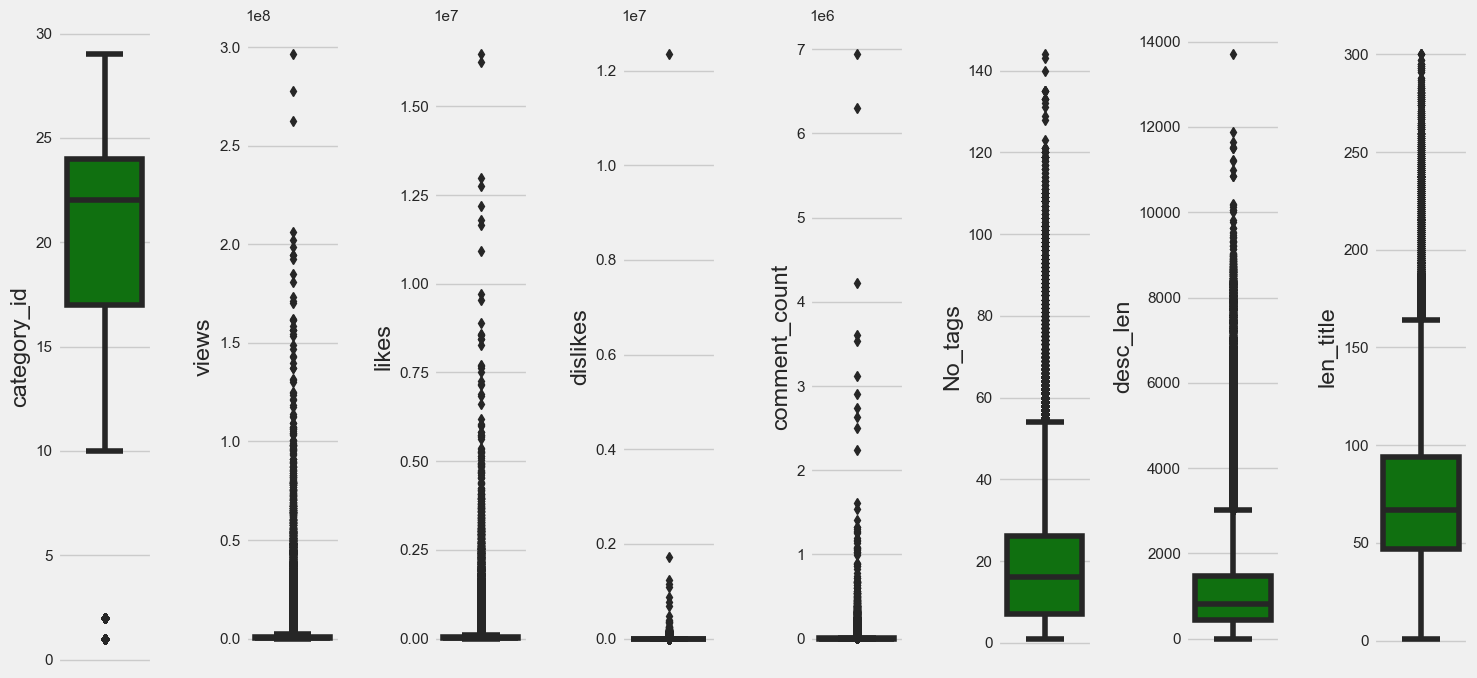

In [15]:
# look at the distribution of data with boxplot
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout();
#plt.savefig('fig/boxplot.png')

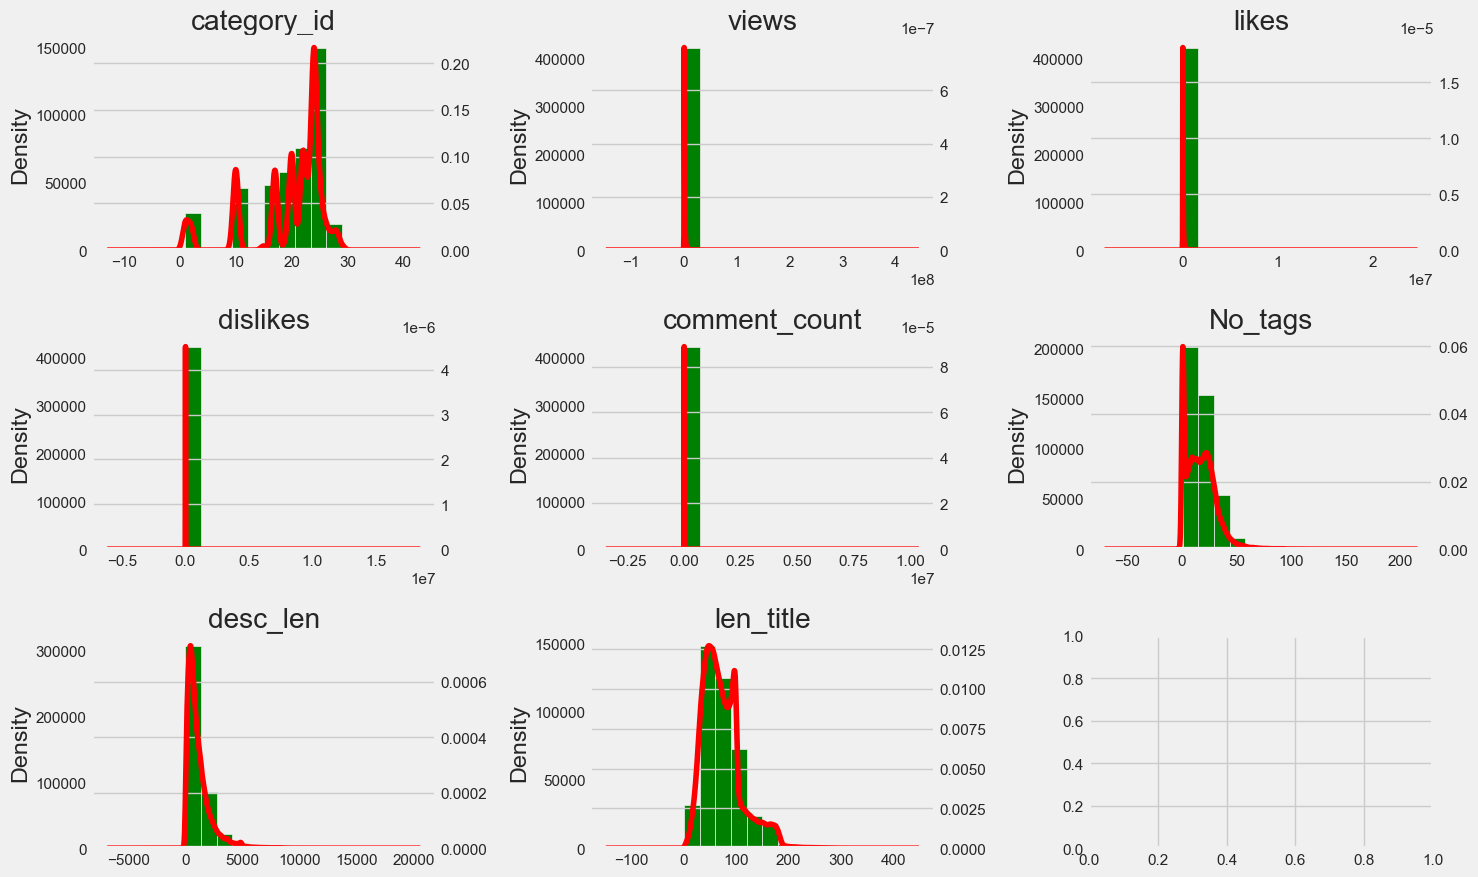

In [16]:
#View data distribution
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout();

In [17]:
#look for unique values from each categorical data
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)
data_cat_unique

,fitur,unik nilai
6,thumbnail_link,423701
0,title,421144
7,description,385769
5,tags,286442
1,publish_time,76747
3,channel_title,44257
2,channelId,42224
4,publish_date,1189
8,country,11


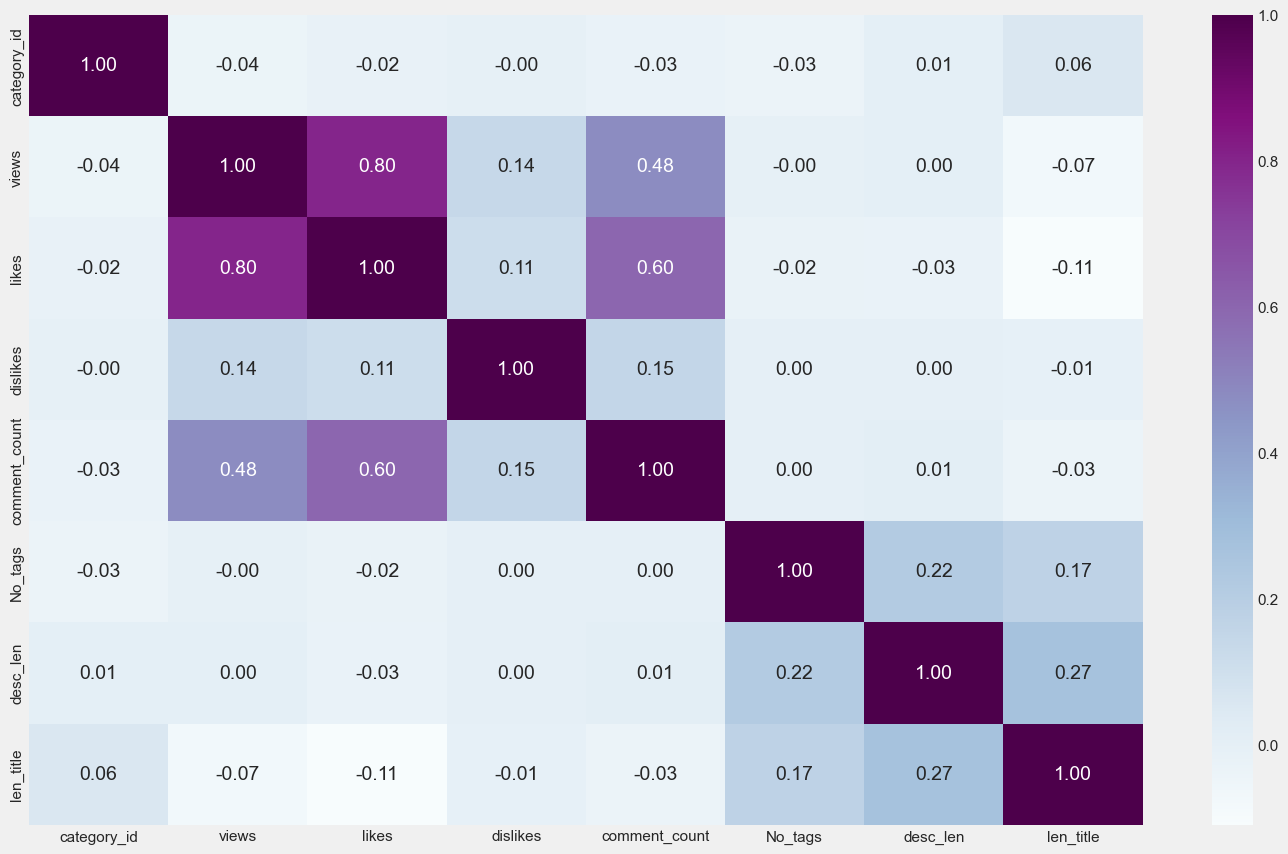

In [18]:
#create a correlation matrix from each numeric data
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

<Figure size 1000x800 with 0 Axes>

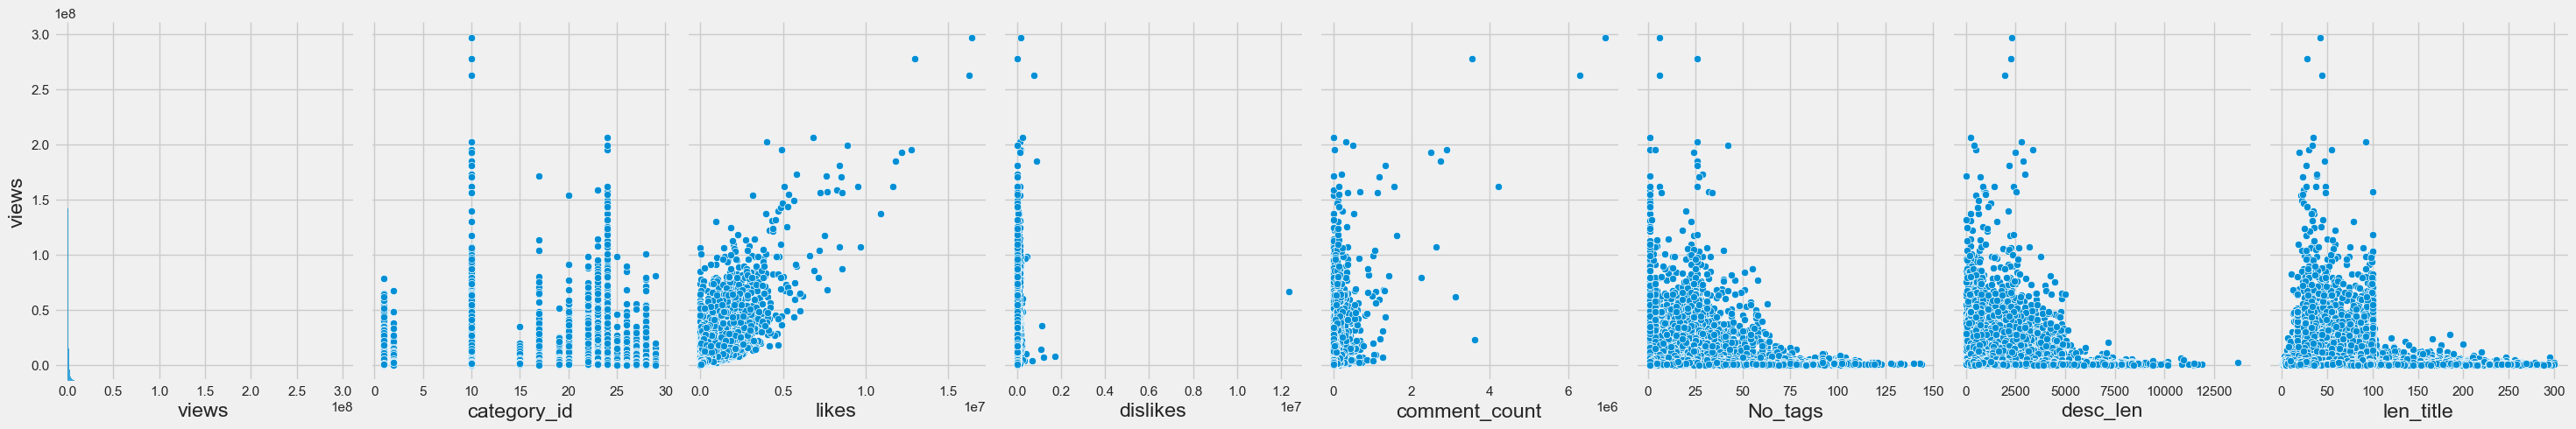

In [19]:
#create a pairplot graph from each numeric data
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars=['views','category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title'], y_vars=['views'], height=5, aspect=0.75);
fig.tight_layout();

In [20]:
#see the number of missing values from the data frame
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,title,0
1,publish_time,0
2,channelId,0
3,channel_title,0
4,publish_date,0
5,category_id,0
6,trending_date,0
7,tags,0
8,views,0
9,likes,0


In [21]:
#dropping category_id, publish_date, description, tags, title, channel_title
data_clean = data.drop(['publish_date','description','title','channel_title','tags','publish_time'], axis=1)

In [22]:
data_clean.duplicated().sum()

0

Text(0.5, 0, '')

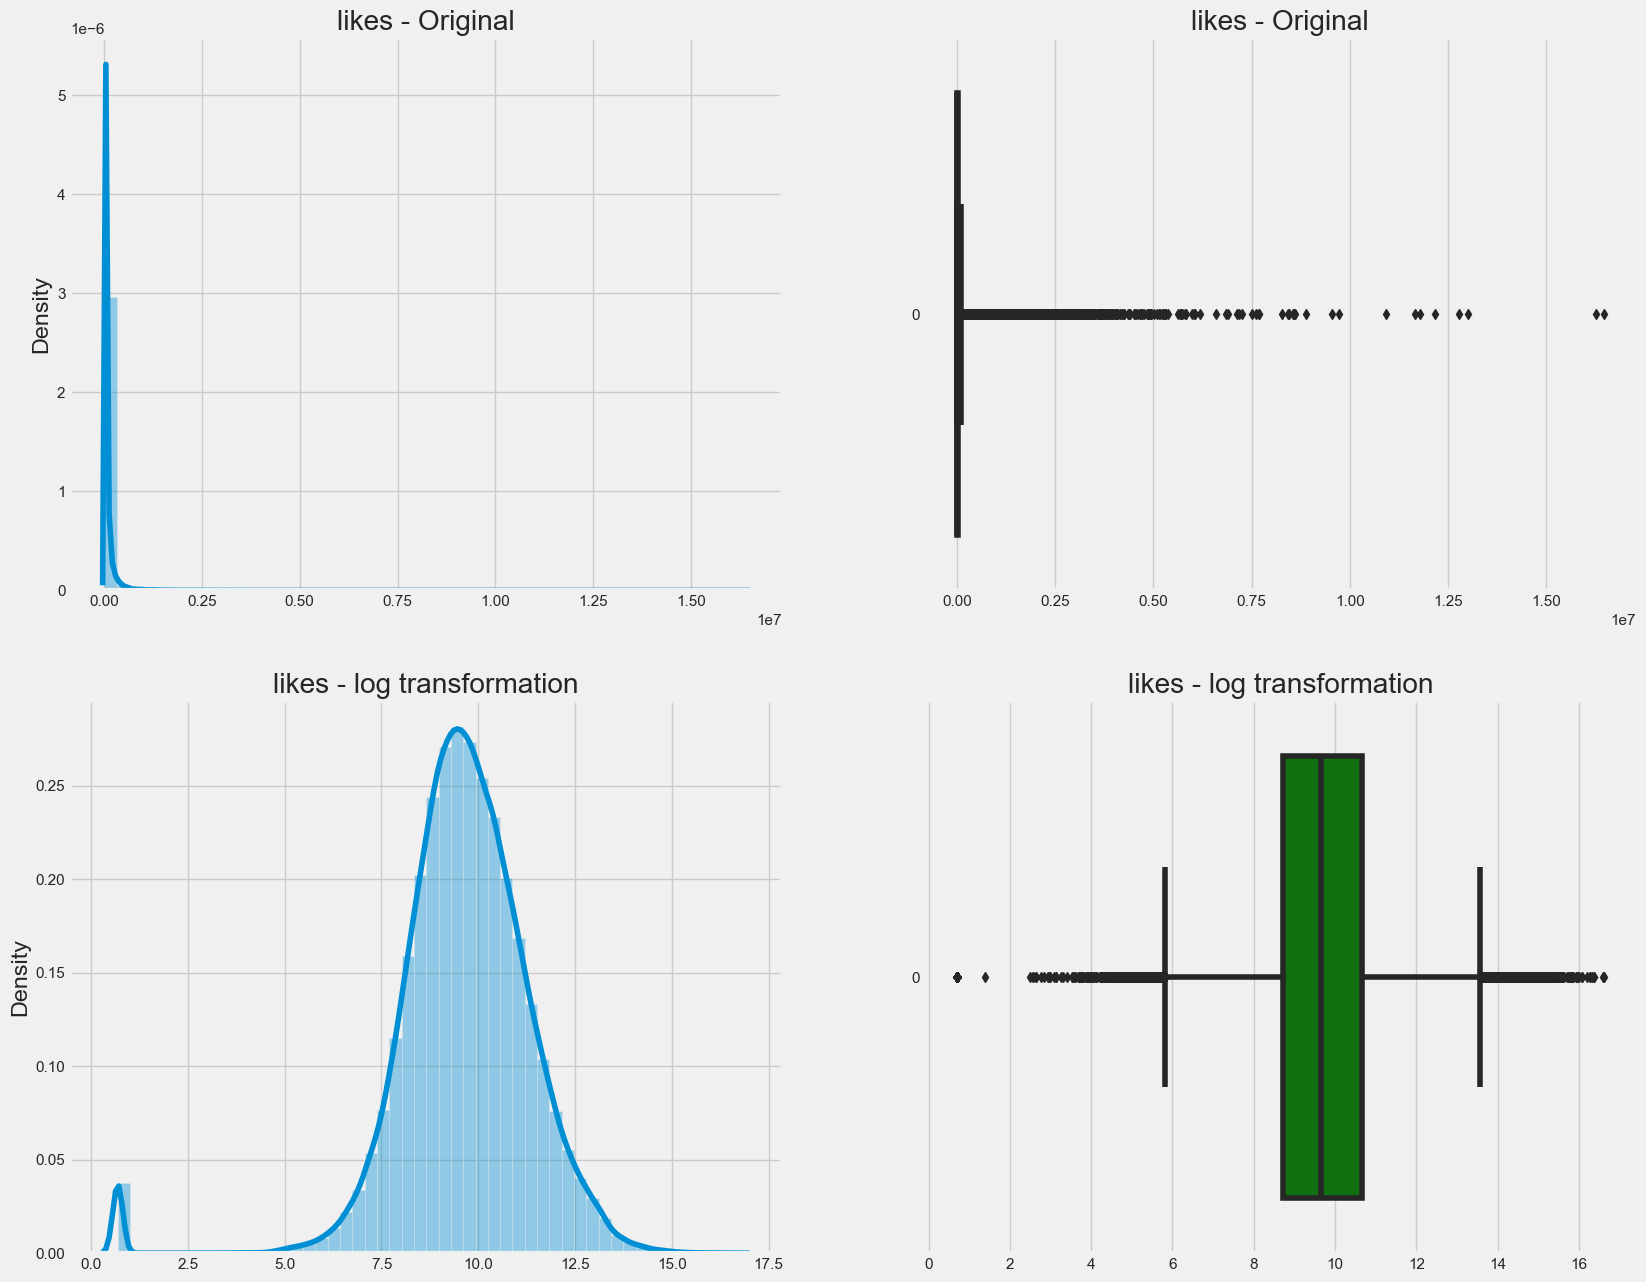

In [23]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

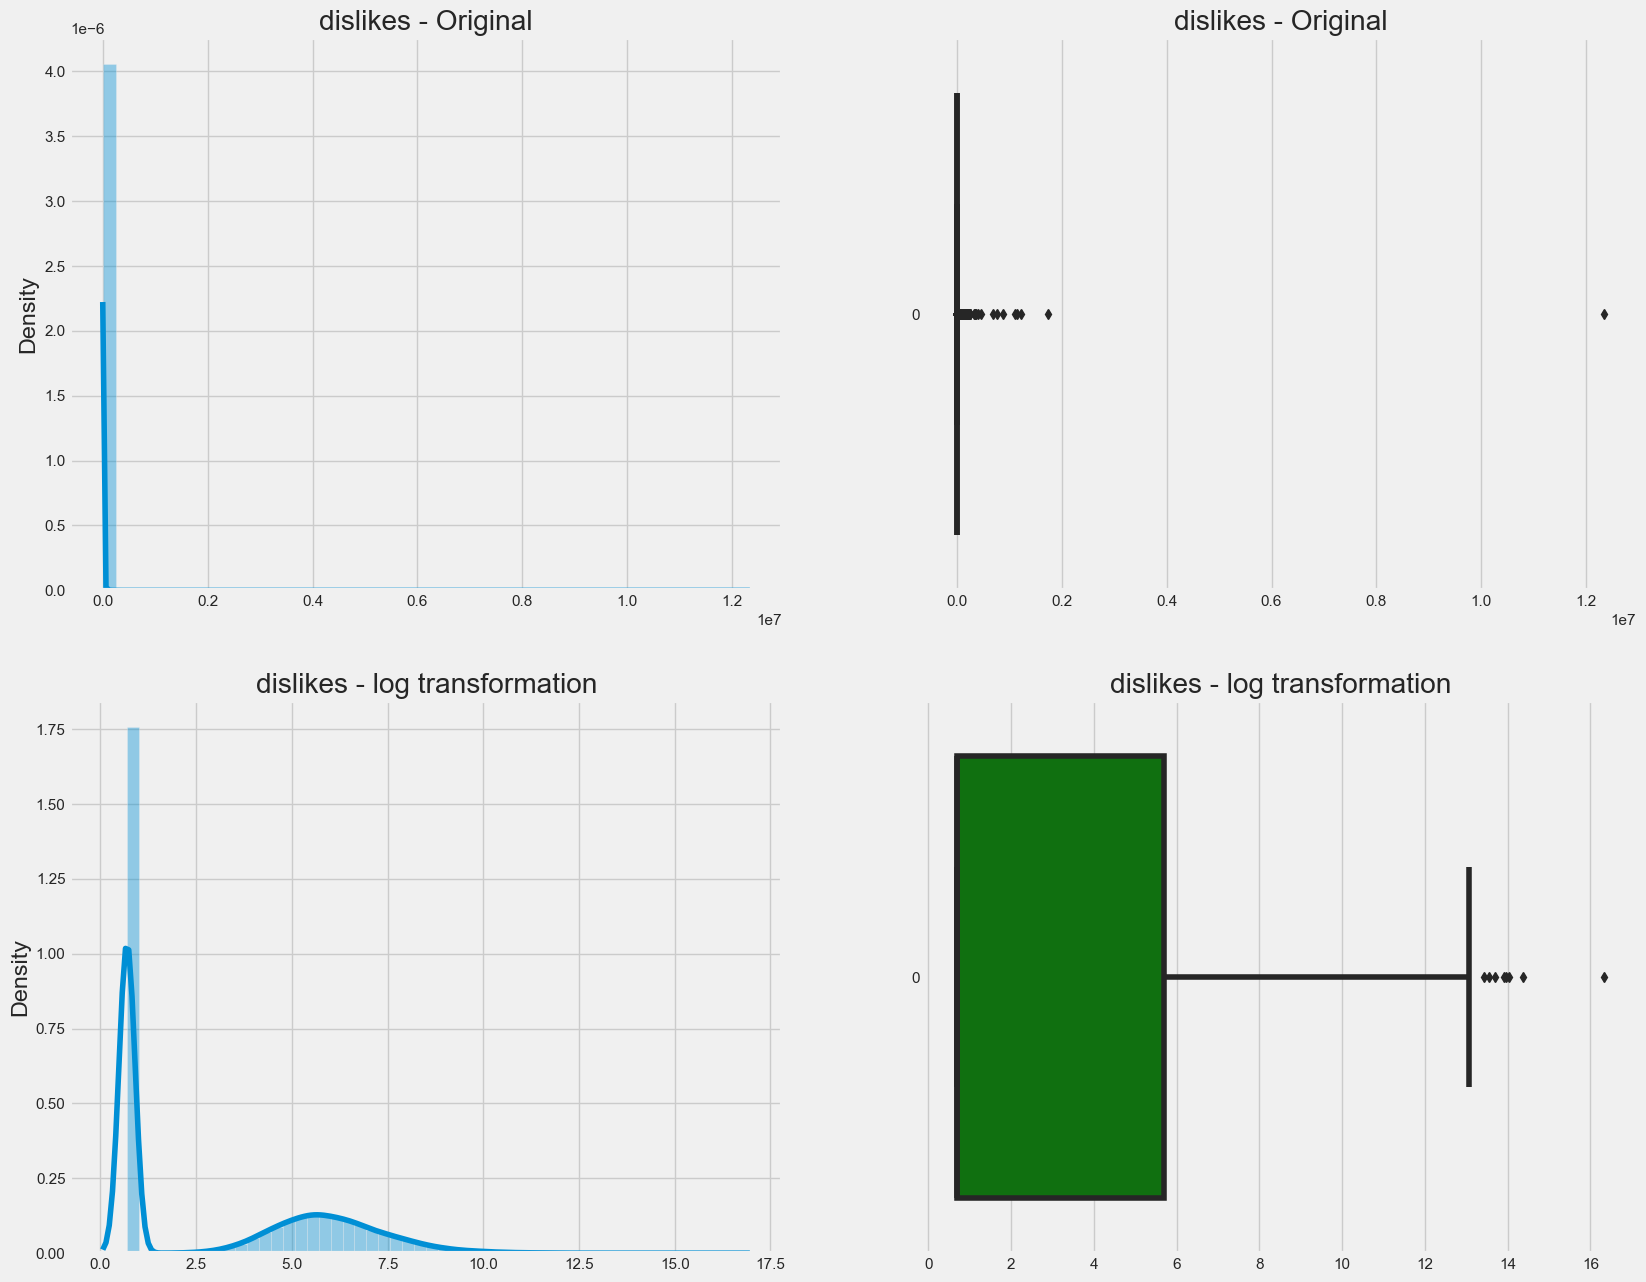

In [24]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

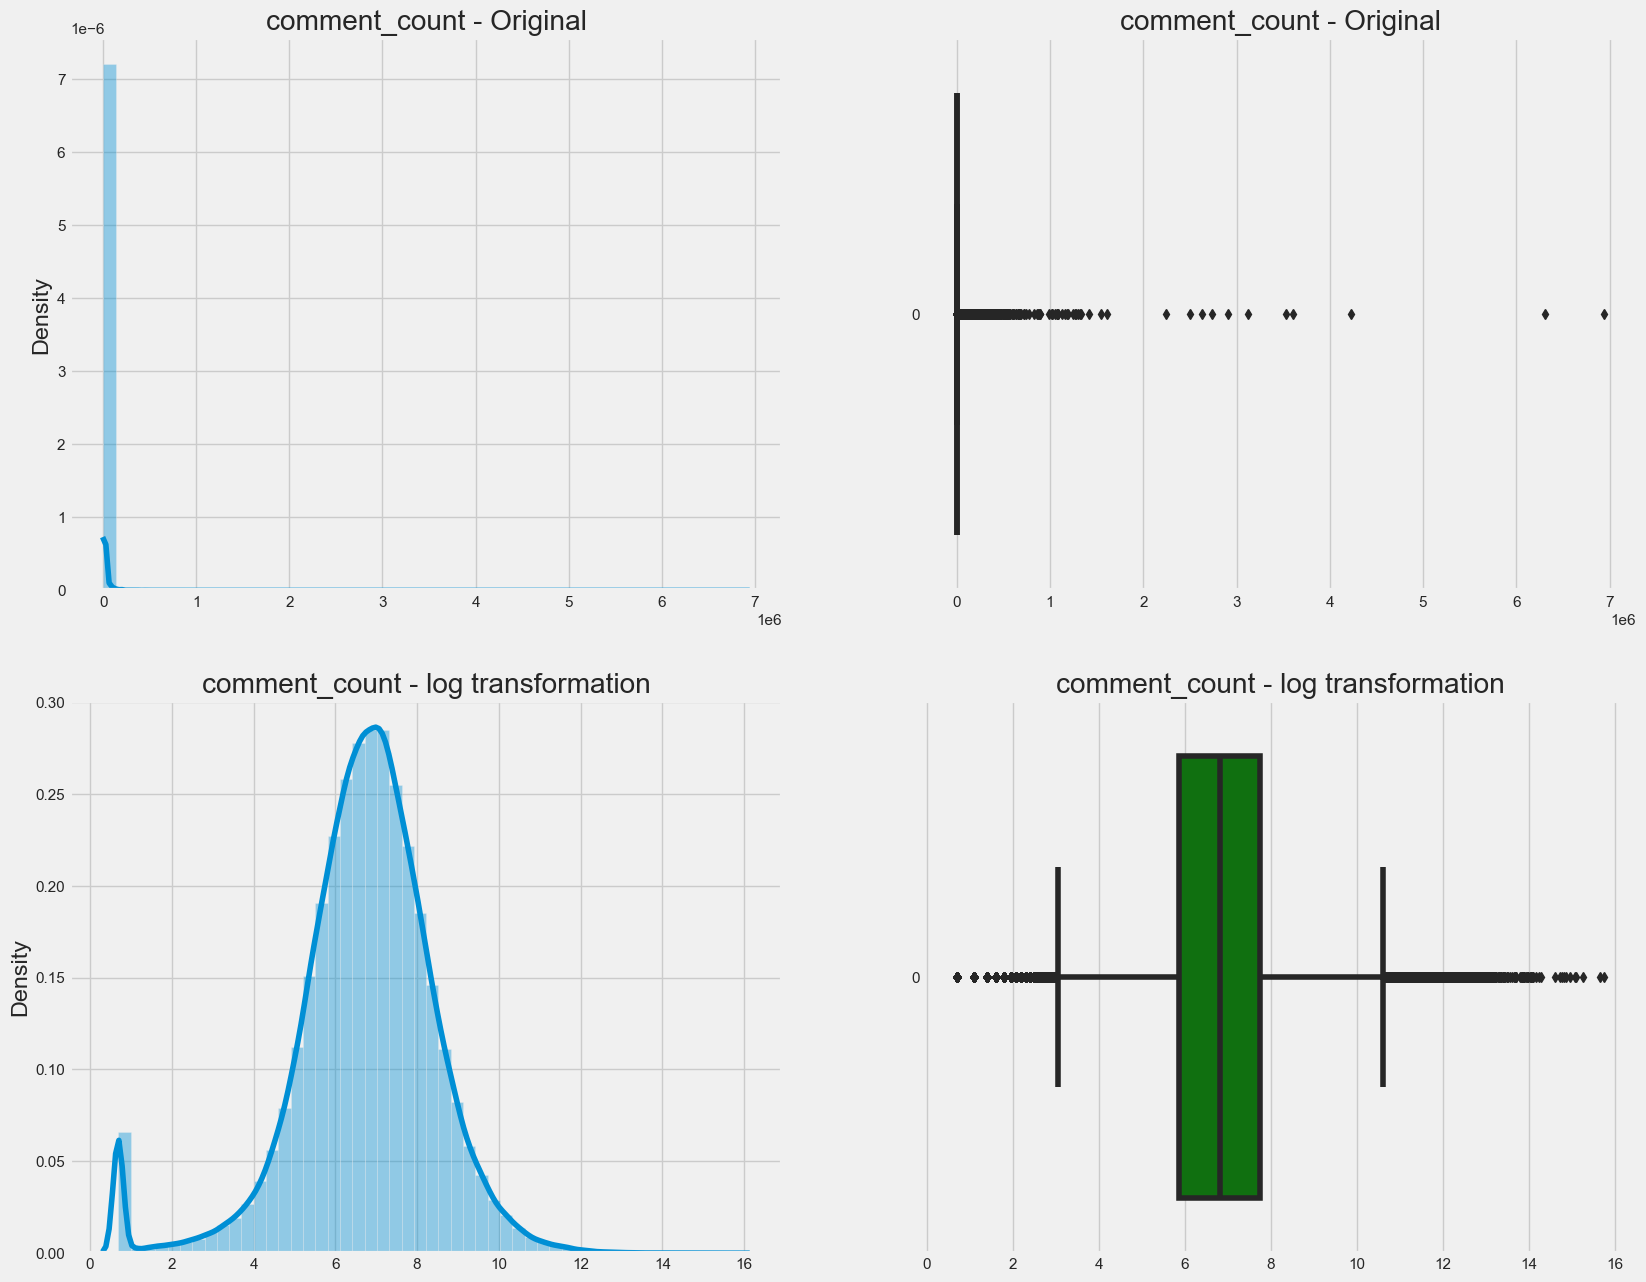

In [25]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

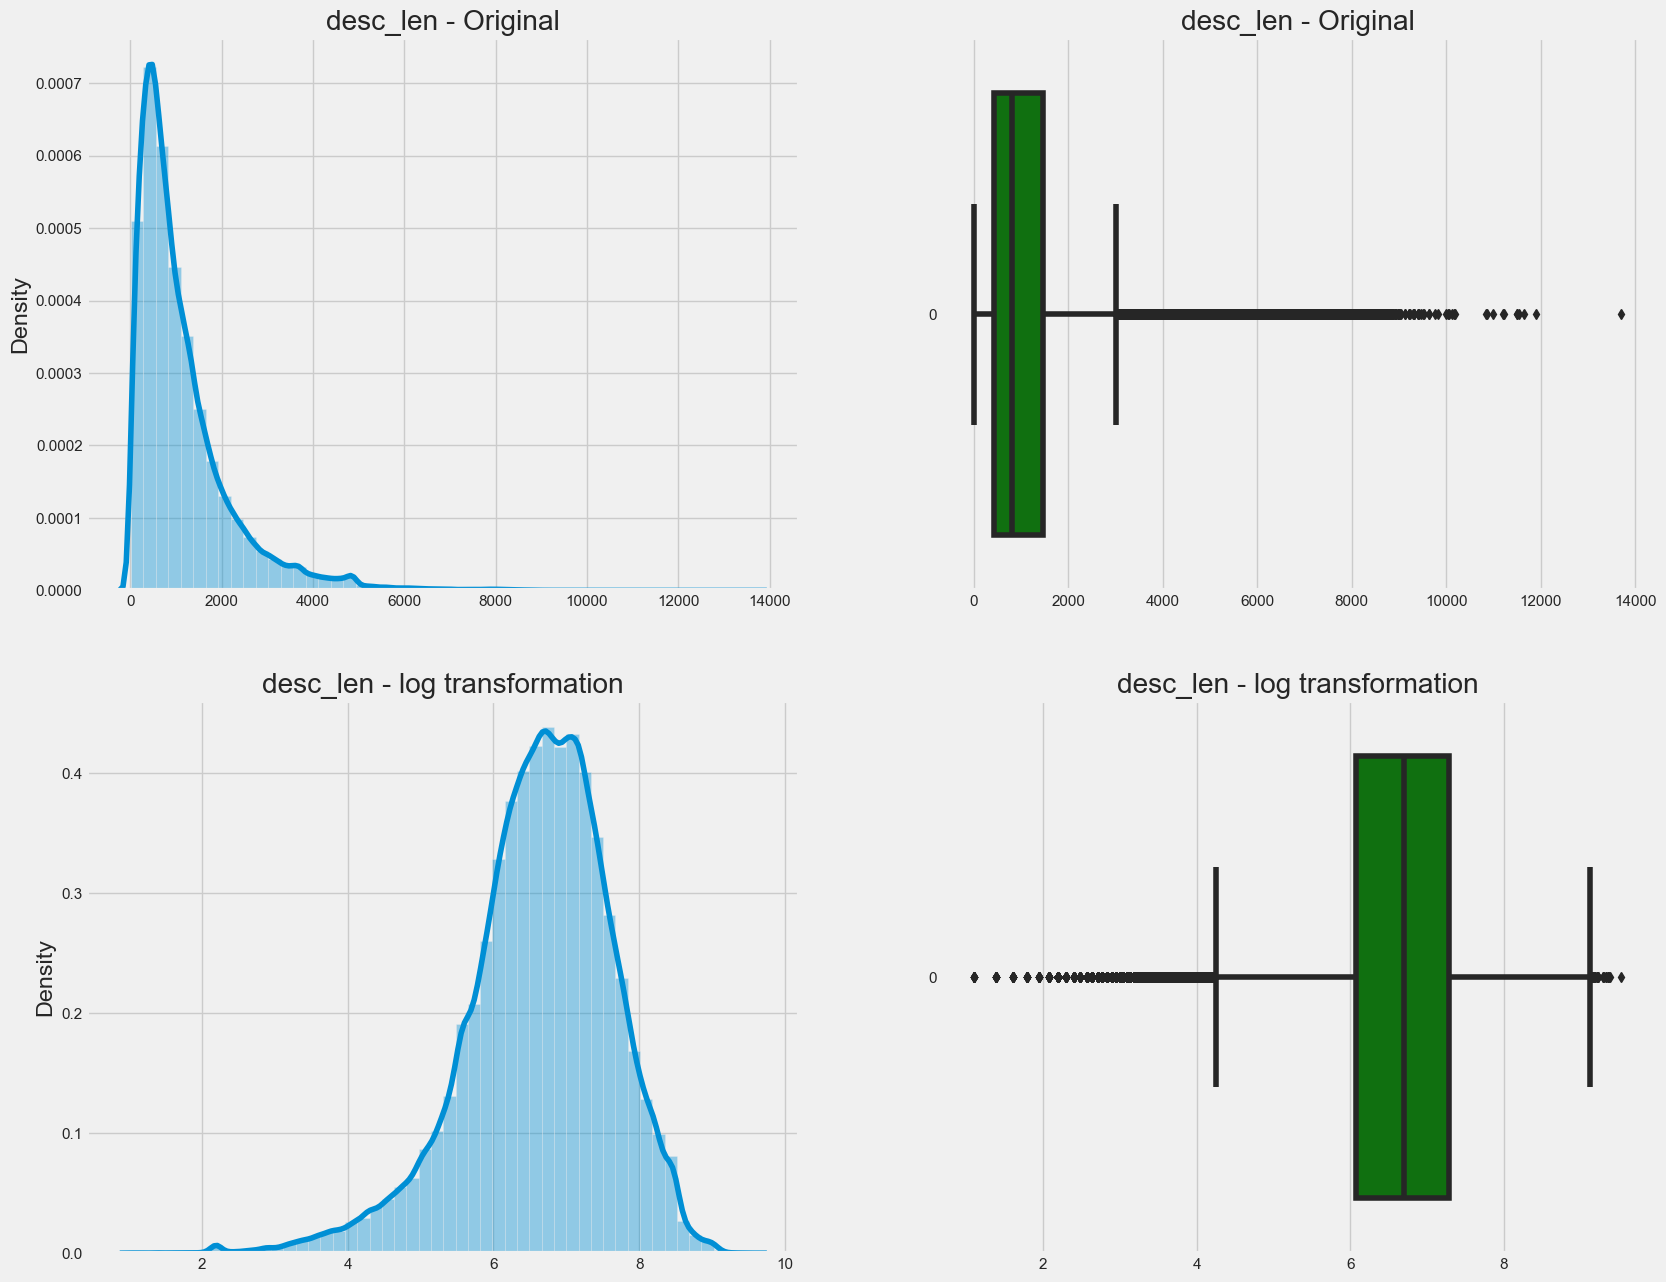

In [26]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['desc_len'],kde=True, ax=ax[0,0])
ax[0,0].set_title('desc_len - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['desc_len'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('desc_len - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['desc_len']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('desc_len - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['desc_len']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('desc_len - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

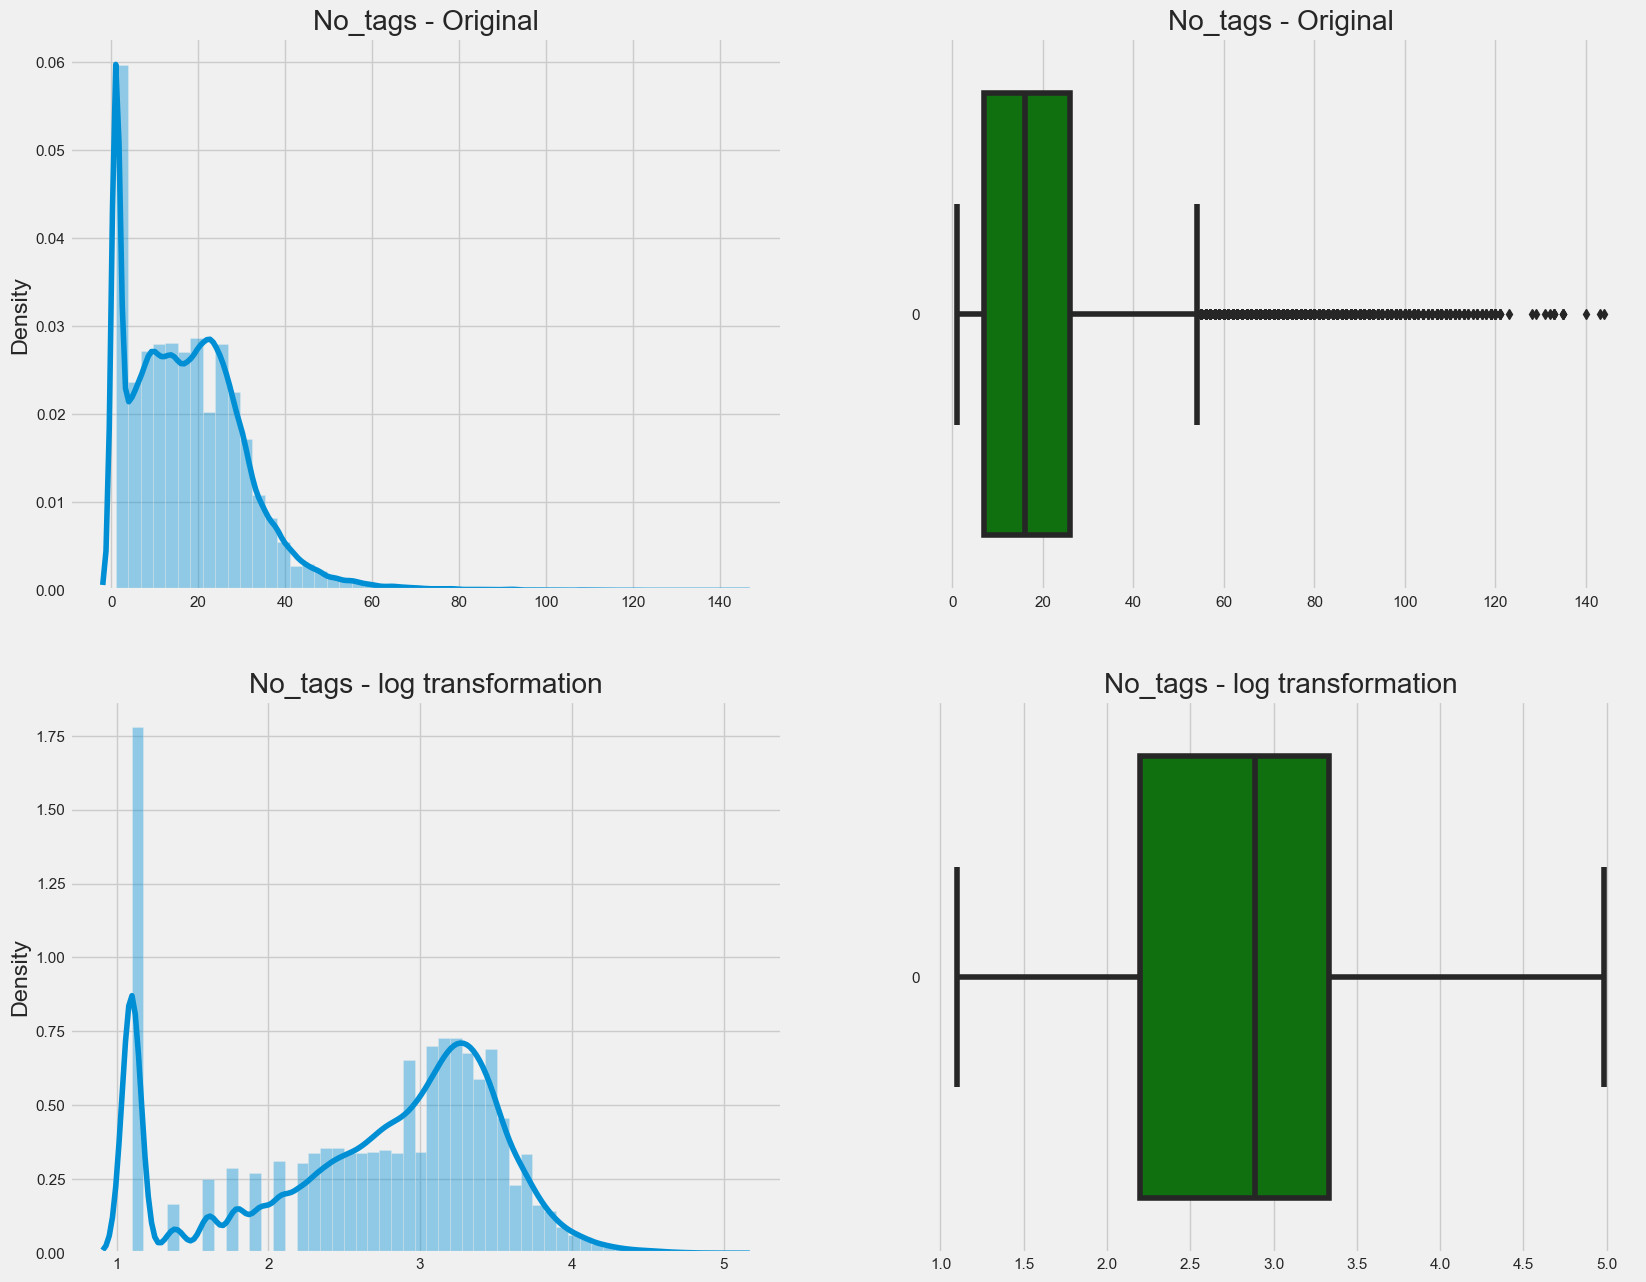

In [27]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['No_tags'],kde=True, ax=ax[0,0])
ax[0,0].set_title('No_tags - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['No_tags'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('No_tags - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['No_tags']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('No_tags - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['No_tags']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('No_tags - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

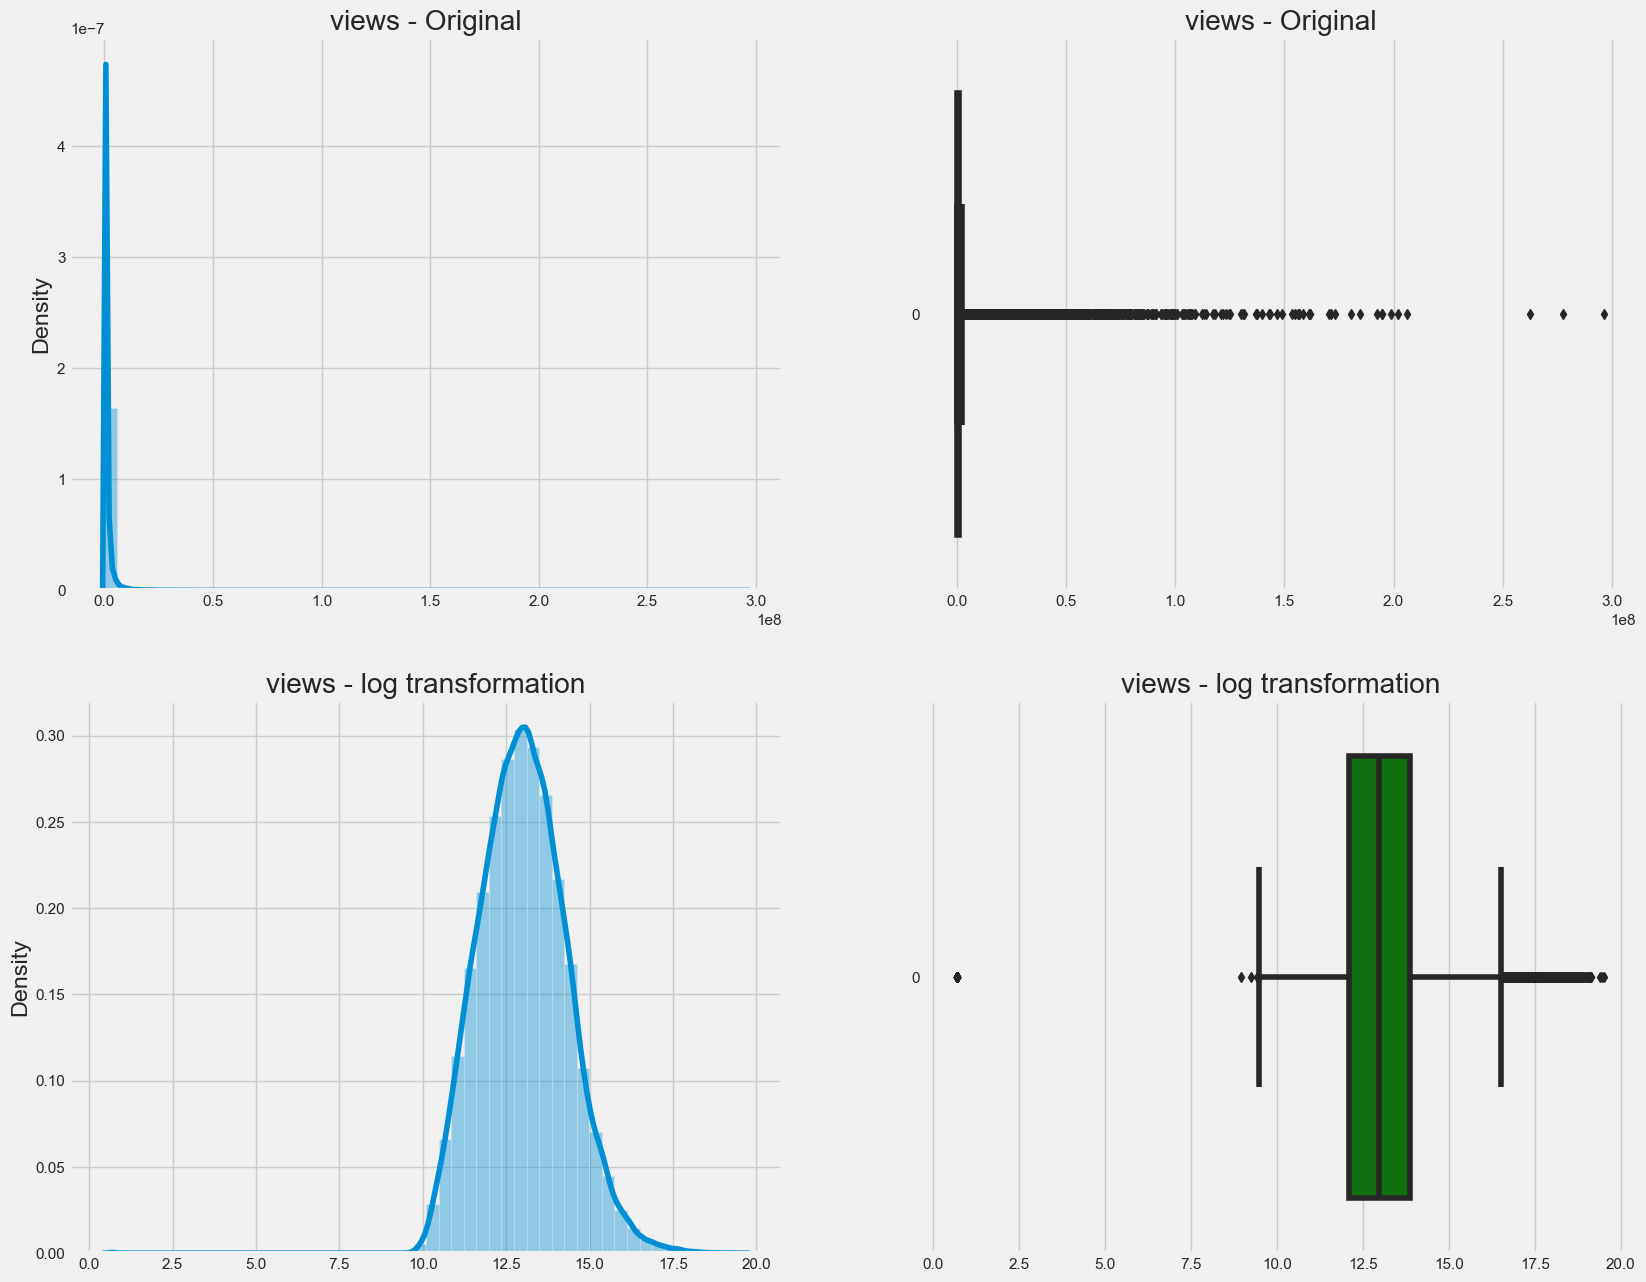

In [28]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

In [29]:
eatures = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

In [30]:
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [31]:
data_clean.describe()

,category_id,views,likes,dislikes,comment_count,desc_len,len_title,No_tags
count,423701.000000,4.237010e+05,4.237010e+05,4.237010e+05,4.237010e+05,423701.000000,423701.000000,423701.000000
mean,19.661353,1.156304e+06,5.238917e+04,7.302550e+02,3.219317e+03,1128.266672,73.786323,17.594993
std,6.688615,3.520640e+06,1.696745e+05,1.995569e+04,2.545072e+04,1052.274973,37.156764,13.281585
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,17.000000,1.796650e+05,6.167000e+03,0.000000e+00,3.500000e+02,431.000000,47.000000,7.000000
50%,22.000000,4.345290e+05,1.561600e+04,0.000000e+00,9.180000e+02,813.000000,67.000000,16.000000
75%,24.000000,1.050711e+06,4.278300e+04,2.990000e+02,2.345000e+03,1466.000000,94.000000,26.000000
max,29.000000,2.963142e+08,1.646425e+07,1.234147e+07,6.939302e+06,13702.000000,300.000000,144.000000


In [32]:
df_pre = df_pre.drop(columns = 'channelId')
df_pre = df_pre.drop(columns = 'thumbnail_link')
df_pre.head()

,category_id,trending_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,country,desc_len,...,log_desc_len,log_len_title,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title
video_id,,,,,,,,,,,,,,,,,,,,,
n7C3aXBzM7s,24,2020-08-12,441390,19862,483,1288,False,False,IN,838,...,6.732211,4.553877,0.821429,0.001490,0.001206,0.000039,0.000186,0.118881,0.061090,0.311037
lT6HV0Iweyo,24,2020-08-12,60749,477,80,18,False,False,IN,583,...,6.369901,4.595120,0.821429,0.000205,0.000029,0.000006,0.000003,0.139860,0.042479,0.324415
M91gKrhW8tY,28,2020-08-12,429257,79918,494,4806,False,False,BR,1439,...,7.272398,3.951244,0.964286,0.001449,0.004854,0.000040,0.000693,0.118881,0.104956,0.167224
efBoqfN2aWs,24,2020-08-12,284510,65009,345,1753,False,False,BR,763,...,6.638568,4.356709,0.821429,0.000960,0.003948,0.000028,0.000253,0.034965,0.055616,0.254181
trC97FklM7o,22,2020-08-12,268654,4419,199,74,False,False,IN,382,...,5.948035,4.615121,0.750000,0.000907,0.000268,0.000016,0.000011,0.000000,0.027808,0.331104


<AxesSubplot:>

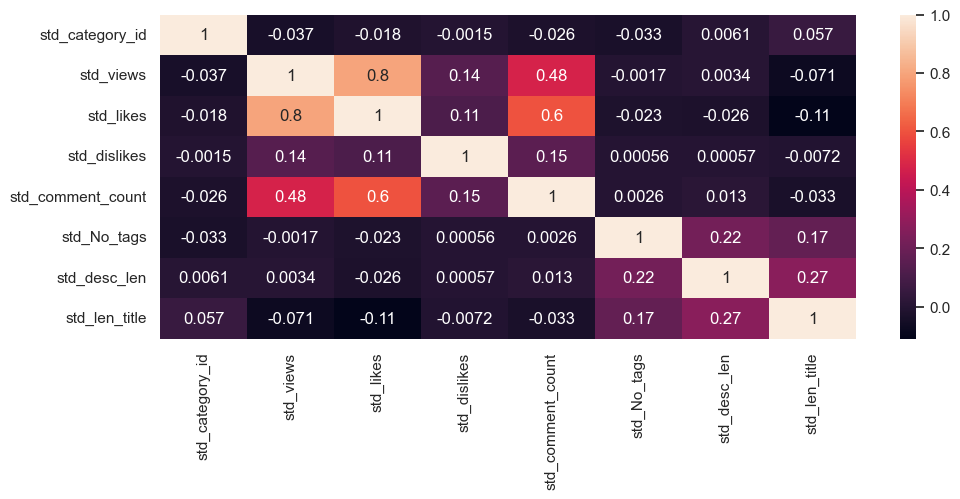

In [33]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']].corr(), annot=True)
#plt.savefig('fig/split train test.png')

In [34]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']] # menggunakan semua feature kecuali target
y = df_pre['std_views']

In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42) #Splitting the data into Train and Test

In [36]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [37]:
pred = regressor.predict(xtest) #Predicting the views

In [38]:
np.exp(pred).round() # inverse log transform

array([1., 1., 1., ..., 1., 1., 1.])

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [40]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-0.00112382  0.92595763  0.3401227  -0.04074823  0.00116853  0.00302194
  0.00101581]
Intercept: 
 0.0010656679139583805
MAE: 0.00
RMSE: 0.01
R2 score: 0.61


In [41]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [42]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [-1.11804987e-03  8.89525965e-01  1.78150915e-01  2.42830612e-02
  1.14177614e-03  2.97997924e-03  7.44891199e-04]
Intercept: 
 0.0012296959196504633
MAE: 0.00
RMSE: 0.01
R2 score: 0.61


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [44]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.18


In [45]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

Lasso()

In [46]:
pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: -0.00


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda

hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [48]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: -0.00


In [49]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

ElasticNet()

In [50]:
pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: -0.00


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [52]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.61


In [53]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.43


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.73


Text(0.5, 1.0, 'feature importance score')

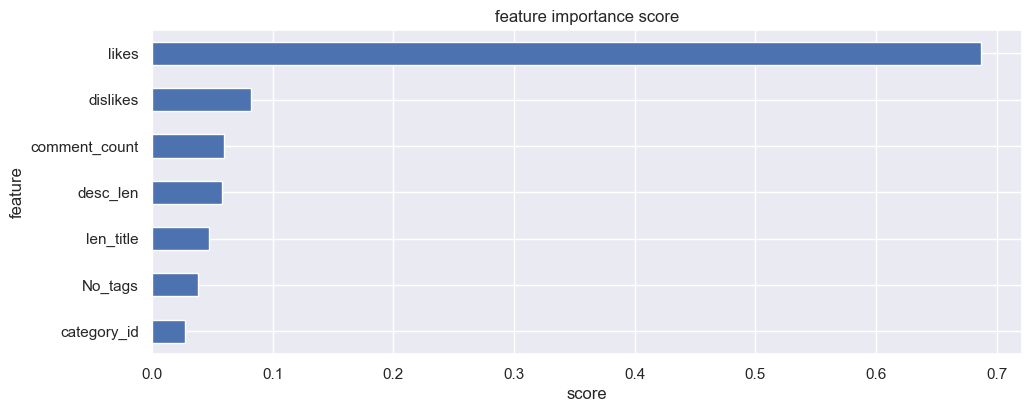

In [55]:
#make feature importance graph
X=data[['category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [57]:
from sklearn.svm import LinearSVR

svr = LinearSVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.59


In [58]:
import pickle
pickle.dump(best_model1, open('RandomForest_model.pkl', 'wb'))

In [60]:
loaded_model = pickle.load(open('RandomForest_model.pkl', 'rb'))
result = best_model1.score(xtest,ytest)
print('Model Score : ', str(round(result,2)*100), '%')

Model Score :  73.0 %


In [61]:
print('train accuracy : ', str(round(best_model1.score(xtrain, ytrain),2)*100), '%')
print('test accuracy : ', str(round(best_model1.score(xtest, ytest),2)*100), '%')

train accuracy :  97.0 %
test accuracy :  73.0 %
